# NLTK using Python

<div style="text-align:right" >Rahul Reddy Gajjada</div>

In [36]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
data = pd.read_csv("spooky-author-identification//train//train.csv")

In [7]:
data.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [13]:
print(data.shape)
print(set(data.author))

(19579, 3)
{'MWS', 'EAP', 'HPL'}


## Bar chart 

In [17]:
# extracting the number of examples of each class
EAP_len = data[data['author'] == 'EAP'].shape[0]
HPL_len = data[data['author'] == 'HPL'].shape[0]
MWS_len = data[data['author'] == 'MWS'].shape[0]
print(EAP_len, HPL_len, MWS_len)

7900 5635 6044


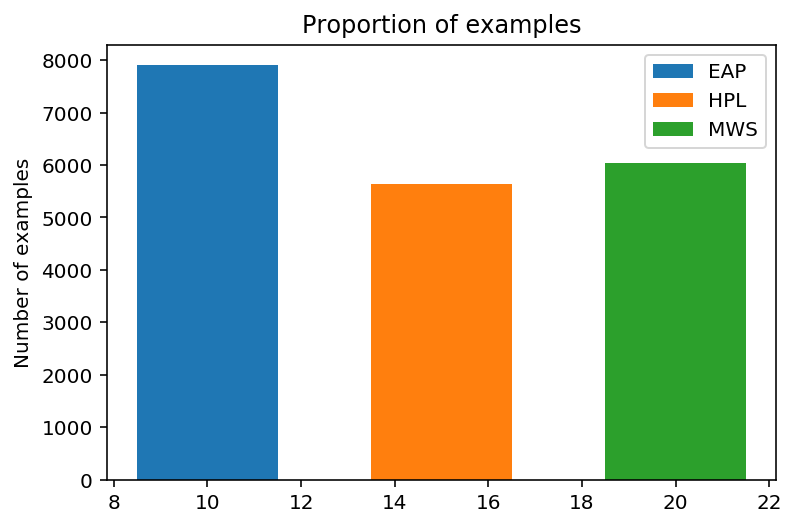

In [19]:
# bar plot of the 3 classes
plt.bar(10,EAP_len,3, label="EAP")
plt.bar(15,HPL_len,3, label="HPL")
plt.bar(20,MWS_len,3, label="MWS")
plt.legend()
plt.ylabel('Number of examples')
plt.title('Proportion of examples')
plt.show()

## Feature Engineering

### Function to remove punctuation

In [20]:
def remove_punctuation(text):
    '''a function for removing punctuation.'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [22]:
data['text'] = data['text'].apply(remove_punctuation)
data.head(10)

,id,text,author
0,id26305,This process however afforded me no means of a...,EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,In his left hand was a gold snuff box from whi...,EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,Finding nothing else not even gold the Superin...,HPL
5,id22965,A youth passed in solitude my best years spent...,MWS
6,id09674,The astronomer perhaps at this point took refu...,EAP
7,id13515,The surcingle hung in ribands from my body,EAP
8,id19322,I knew that you could not say to yourself ster...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


## Removing Stop Words

### Extract the stop words

In [35]:
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [37]:
print("Number of stopwords: ", len(sw))

Number of stopwords:  179


In [38]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [39]:
data['text'] = data['text'].apply(stopwords)
data.head(10)

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL
5,id22965,youth passed solitude best years spent gentle ...,MWS
6,id09674,astronomer perhaps point took refuge suggestio...,EAP
7,id13515,surcingle hung ribands body,EAP
8,id19322,knew could say stereotomy without brought thin...,EAP
9,id00912,confess neither structure languages code gover...,MWS


## Top Words

In [40]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [41]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

υπνος         25256
οἶδα          25255
émeutes       25254
élite         25253
æschylus      25252
ærostation    25251
æronauts      25250
æronaut       25249
ærial         25248
æneid         25247
æmilianus     25246
ægyptus       25245
ædiles        25244
ædile         25243
ångstrom      25242
zuro          25241
zubmizzion    25240
zorry         25239
zopyrus       25238
zones         25237
dtype: int64


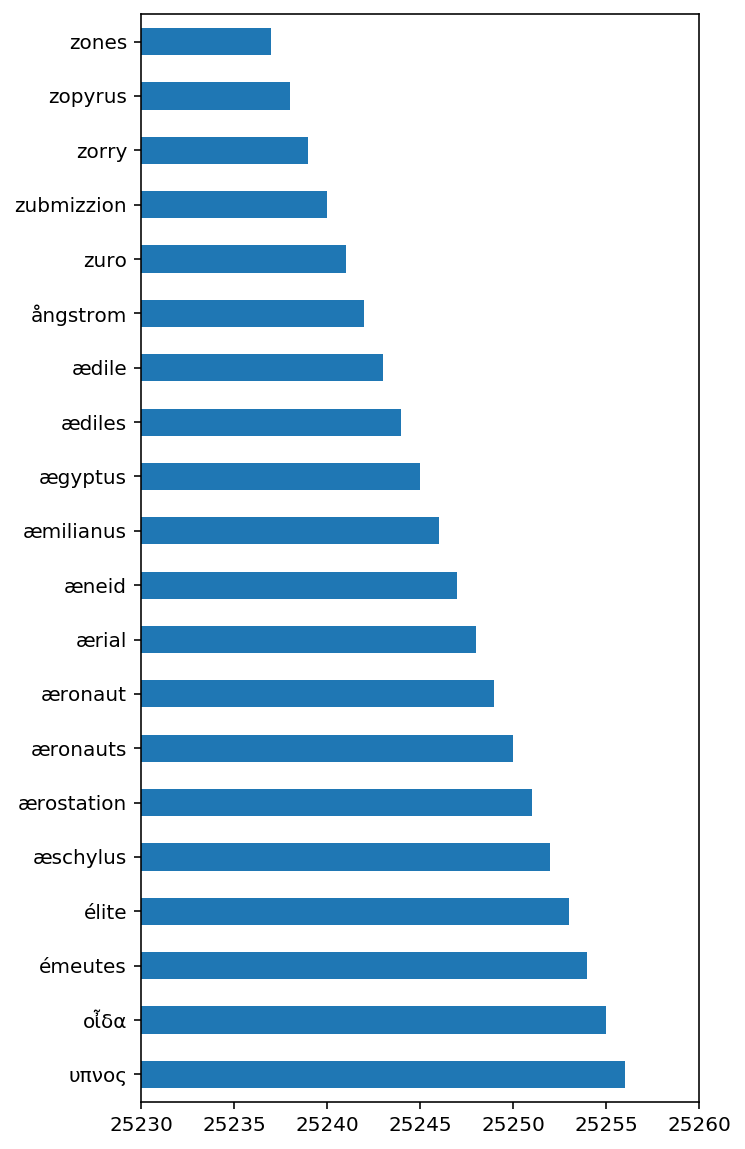

In [56]:
top_vocab = vocab_bef_stem.head(20)
print(top_vocab)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

## Stemming
Stemming operation bundles together words of same root. 
E.g. stem operation bundles "response" and "respond" into a common "respon"

In [43]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [44]:
data['text'] = data['text'].apply(stemming)
data.head(10)

,id,text,author
0,id26305,process howev afford mean ascertain dimens dun...,EAP
1,id17569,never occur fumbl might mere mistak,HPL
2,id11008,left hand gold snuff box caper hill cut manner...,EAP
3,id27763,love spring look windsor terrac sixteen fertil...,MWS
4,id12958,find noth els even gold superintend abandon at...,HPL
5,id22965,youth pass solitud best year spent gentl femin...,MWS
6,id09674,astronom perhap point took refug suggest non l...,EAP
7,id13515,surcingl hung riband bodi,EAP
8,id19322,knew could say stereotomi without brought thin...,EAP
9,id00912,confess neither structur languag code govern p...,MWS


## Top words after stemming

In [45]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
tfid_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()


υπνος         15141
οἶδα          15140
émeut         15139
élite         15138
æschylus      15137
ærostat       15136
æronaut       15135
ærial         15134
æneid         15133
æmilianus     15132
ægyptus       15131
ædile         15130
ångstrom      15129
zuro          15128
zubmizzion    15127
zorri         15126
zopyrus       15125
zone          15124
zokkar        15123
zoilus        15122
dtype: int64


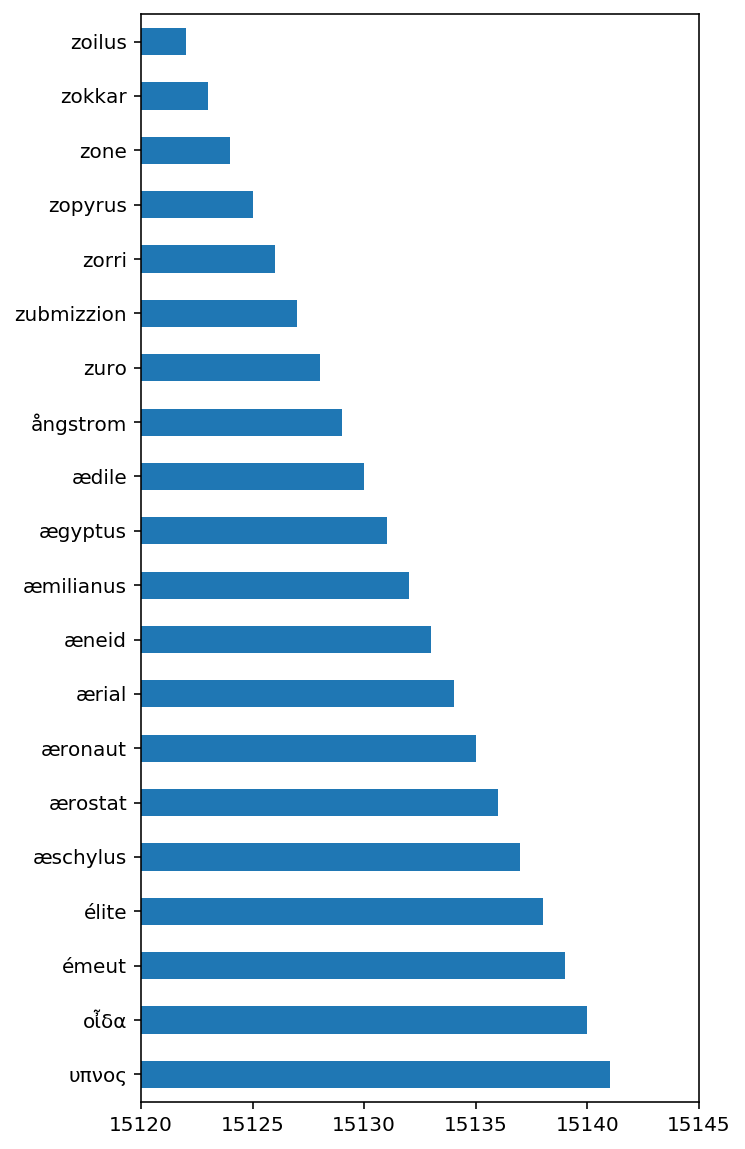

In [60]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vocab = vocab_after_stem.head(20)
print(top_vocab)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

## Histogram of length of each writer

In [61]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [62]:
data['length'] = data['text'].apply(length)
data.head(10)

,id,text,author,length
0,id26305,process howev afford mean ascertain dimens dun...,EAP,136
1,id17569,never occur fumbl might mere mistak,HPL,35
2,id11008,left hand gold snuff box caper hill cut manner...,EAP,113
3,id27763,love spring look windsor terrac sixteen fertil...,MWS,137
4,id12958,find noth els even gold superintend abandon at...,HPL,102
5,id22965,youth pass solitud best year spent gentl femin...,MWS,265
6,id09674,astronom perhap point took refug suggest non l...,EAP,75
7,id13515,surcingl hung riband bodi,EAP,25
8,id19322,knew could say stereotomi without brought thin...,EAP,267
9,id00912,confess neither structur languag code govern p...,MWS,80


In [63]:
#Extracting data of each class
EAP_data = data[data['author'] == 'EAP']
HPL_data = data[data['author'] == 'HPL']
MWS_data = data[data['author'] == 'MWS']

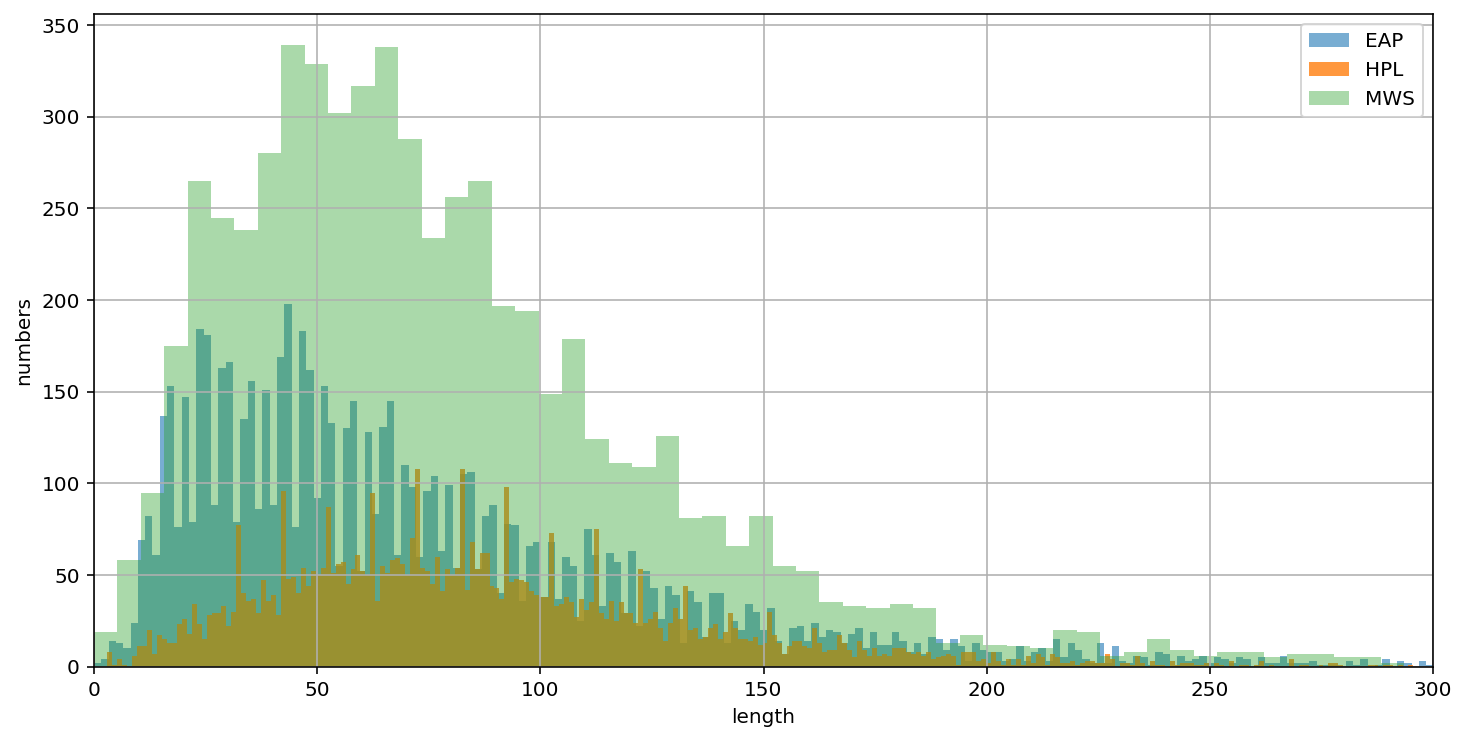

In [64]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(EAP_data['length'], alpha = 0.6, bins=bins, label='EAP')
plt.hist(HPL_data['length'], alpha = 0.8, bins=bins, label='HPL')
plt.hist(MWS_data['length'], alpha = 0.4, bins=bins, label='MWS')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

## Top words of each writer and their count

### EAP

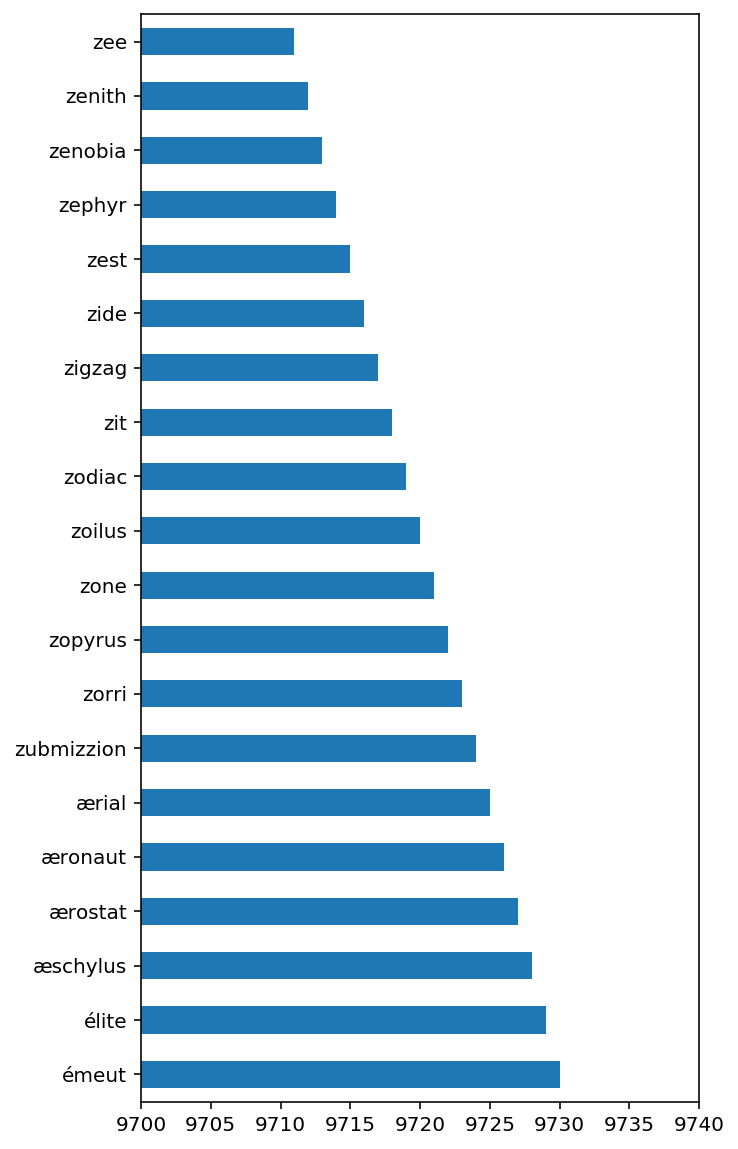

In [65]:
# create the object of tfid vectorizer
EAP_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
EAP_tfid_vectorizer.fit(EAP_data['text'])
# collect the vocabulary items used in the vectorizer
EAP_dictionary = EAP_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in EAP_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
EAP_vocab = pd.Series(count, index=vocab)
# sort the dataframe
EAP_vocab = EAP_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vocab = EAP_vocab.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (9700, 9740))

### MWS

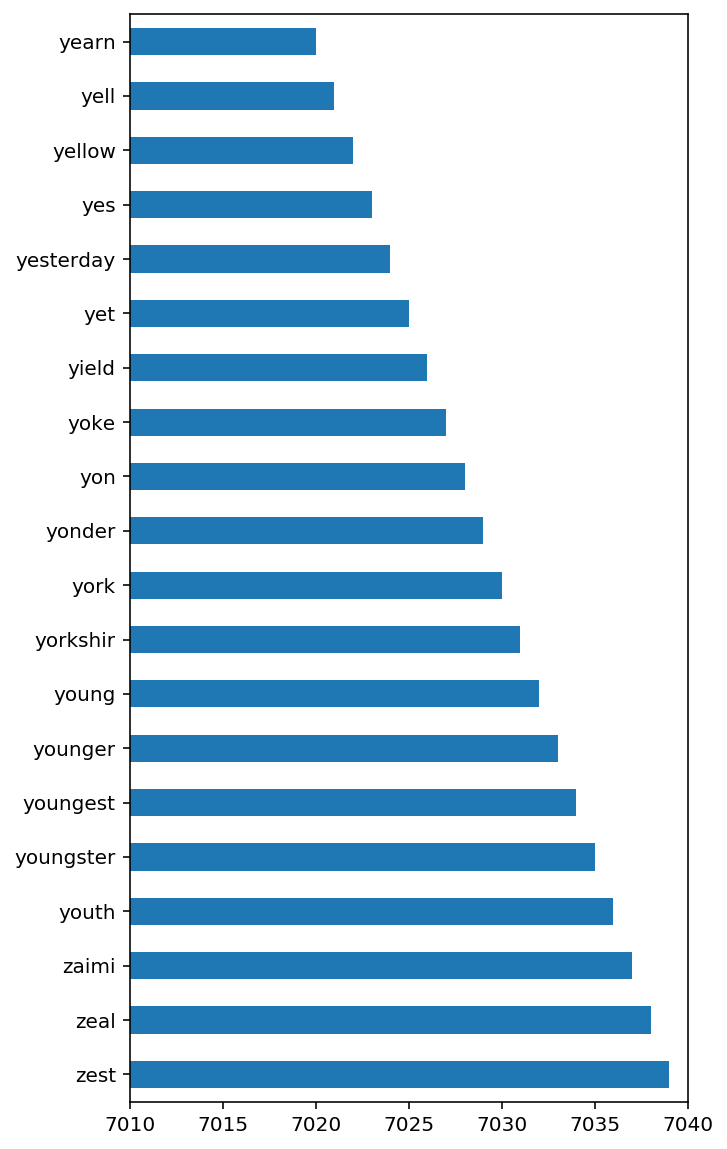

In [66]:
# create the object of tfid vectorizer
MWS_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
MWS_tfid_vectorizer.fit(MWS_data['text'])
# collect the vocabulary items used in the vectorizer
MWS_dictionary = MWS_tfid_vectorizer.vocabulary_.items()
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated list
for key, value in MWS_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe and vocab as index    
MWS_vocab = pd.Series(count, index=vocab)
# sort the dataframe
MWS_vocab = MWS_vocab.sort_values(ascending=False)
# plot of the top vocab
top_vocab = MWS_vocab.head(20)
top_vocab.plot(kind = 'barh', figsize=(5,10), xlim= (7010, 7040))

## TF- IDF Extraction

tf-idf weight is product of two terms: 
the first term is the normalized Term Frequency (TF), aka. the number of times a word appears in a document, 
divided by the total number of words in that document; 

the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).


In [67]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(data['text'])
# collect the tfid matrix in numpy array
array = tfid_matrix.todense()

In [68]:
# store the tf-idf array into pandas dataframe
df = pd.DataFrame(array)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15132,15133,15134,15135,15136,15137,15138,15139,15140,15141
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.266318,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Bi Grams and N-Grams

In [85]:
s = "Natural-language processing (NLP) is an area of computer science " \
    "and artificial intelligence concerned with the interactions " \
    "between computers and human (natural) languages."

In [87]:
import re
from nltk.util import ngrams

s = s.lower()
s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
tokens = [token for token in s.split(" ") if token != ""]
output = list(ngrams(tokens, 2))
for bigram in output:
    print(bigram)

('natural', 'language')
('language', 'processing')
('processing', 'nlp')
('nlp', 'is')
('is', 'an')
('an', 'area')
('area', 'of')
('of', 'computer')
('computer', 'science')
('science', 'and')
('and', 'artificial')
('artificial', 'intelligence')
('intelligence', 'concerned')
('concerned', 'with')
('with', 'the')
('the', 'interactions')
('interactions', 'between')
('between', 'computers')
('computers', 'and')
('and', 'human')
('human', 'natural')
('natural', 'languages')


In [88]:
output = list(ngrams(tokens, 4))
for ngram in output:
    print(ngram)

('natural', 'language', 'processing', 'nlp')
('language', 'processing', 'nlp', 'is')
('processing', 'nlp', 'is', 'an')
('nlp', 'is', 'an', 'area')
('is', 'an', 'area', 'of')
('an', 'area', 'of', 'computer')
('area', 'of', 'computer', 'science')
('of', 'computer', 'science', 'and')
('computer', 'science', 'and', 'artificial')
('science', 'and', 'artificial', 'intelligence')
('and', 'artificial', 'intelligence', 'concerned')
('artificial', 'intelligence', 'concerned', 'with')
('intelligence', 'concerned', 'with', 'the')
('concerned', 'with', 'the', 'interactions')
('with', 'the', 'interactions', 'between')
('the', 'interactions', 'between', 'computers')
('interactions', 'between', 'computers', 'and')
('between', 'computers', 'and', 'human')
('computers', 'and', 'human', 'natural')
('and', 'human', 'natural', 'languages')


In [98]:
text = nltk.word_tokenize("Hello welcome to the world of to learn Categorizing and POS Tagging with NLTK and Python")

nltk.pos_tag(text)


[('Hello', 'NNP'),
 ('welcome', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('of', 'IN'),
 ('to', 'TO'),
 ('learn', 'VB'),
 ('Categorizing', 'NNP'),
 ('and', 'CC'),
 ('POS', 'NNP'),
 ('Tagging', 'NNP'),
 ('with', 'IN'),
 ('NLTK', 'NNP'),
 ('and', 'CC'),
 ('Python', 'NNP')]

In the above output 
'and' is CC, a coordinating conjunction;

'Learn' is VB, or verbs;

'for' is IN, a preposition;

====================================================

The POS tagger in the NLTK library outputs specific tags for certain words. The list of POS tags is as follows, with examples of what each POS stands for.

    CC coordinating conjunction 
    CD cardinal digit
    DT determiner
    EX existential there (like: “there is” … think of it like “there exists”)
    FW foreign word
    IN preposition/subordinating conjunction
    JJ adjective ‘big’
    JJR adjective, comparative ‘bigger’
    JJS adjective, superlative ‘biggest’
    LS list marker 1)
    MD modal could, will
    NN noun, singular ‘desk’
    NNS noun plural ‘desks’
    NNP proper noun, singular ‘Harrison’
    NNPS proper noun, plural ‘Americans’
    PDT predeterminer ‘all the kids’
    POS possessive ending parent’s
    PRP personal pronoun I, he, she
    PRP$ possessive pronoun my, his, hers$   
    RB adverb very, silently,
    RBR adverb, comparative better
    RBS adverb, superlative best
    RP particle give up
    TO, to go ‘to’ the store.
    UH interjection, errrrrrrrm
    VB verb, base form take
    VBD verb, past tense took
    VBG verb, gerund/present participle taking
    VBN verb, past participle taken
    VBP verb, sing. present, non-3d take
    VBZ verb, 3rd person sing. present takes
    WDT wh-determiner which
    WP wh-pronoun who, what
    WP$ possessive wh-pronoun whose$
    WRB wh-abverb where, when


====================================================

rahul.gajjada@tcs.com